<a href="https://colab.research.google.com/github/genadidharma/pengolahan-citra-dan-visi-komputer/blob/main/Week%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

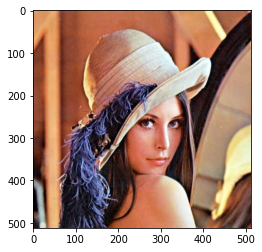

In [3]:
# display & convert image
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 6/Source/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.imshow(img)

# Praktikum

1. Membuat Histogram Warna

<BarContainer object of 256 artists>

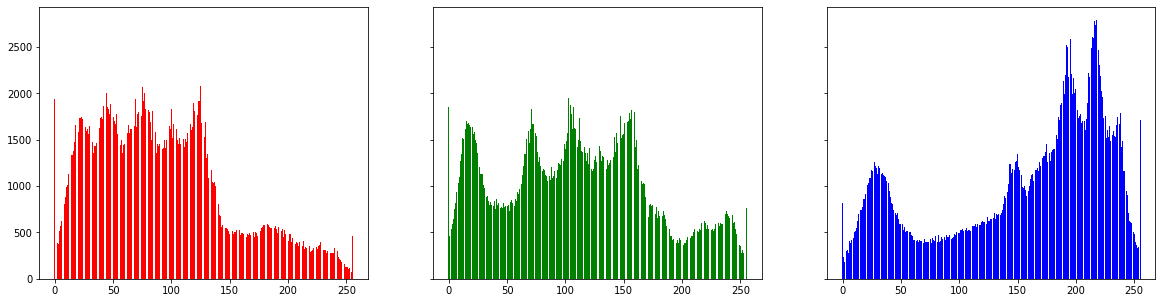

In [4]:
# create bar histogram
#source: https://github.com/rezarinaldi

# make shape of the image
height, width, depth = np.shape(img)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    # count every same color value from 0-255
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] += 1
    red[img[y][x][2]] += 1

# plot the result
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

In [5]:
# summing each color channel pixel amount
# source: https://www.geeksforgeeks.org/opencv-counting-the-number-of-black-and-white-pixels-in-the-image/

red_px_sum = np.sum(img == (255,0,0)) # summing all red channel
green_px_sum = np.sum(img == (0,255,0)) # summing all green channel
green_px_sum = np.sum(img == (0,0,255)) # summing all blue channel

print("Pixels for each color channels are - Red: {}, Green: {}, Blue: {}".format(red_px_sum, green_px_sum, green_px_sum))

Pixels for each color channels are - Red: 5511, Green: 3140, Blue: 3140


2. Membuat Histogram Warna dengan `calcHist`

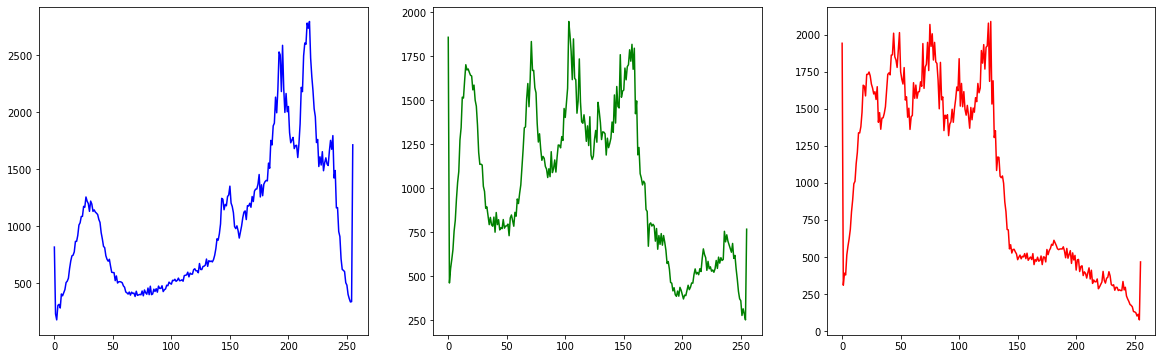

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(20,20))

# loop through each color channel, calculate the histograms and plot them
color = ('b','g','r')
for i, col in enumerate(color):
  histogram = cv.calcHist([img],[i],None,[256],[0,256])
  ax[i].plot(histogram, color=col)

  # create 1:1 aspect ratio for each subplots
  ratio = 1.0
  x_left, x_right = ax[i].get_xlim()
  y_low, y_high = ax[i].get_ylim()
  ax[i].set_aspect(abs((x_right-x_left)/(y_low-y_high))*ratio)


3. Melakukan histogram equalization

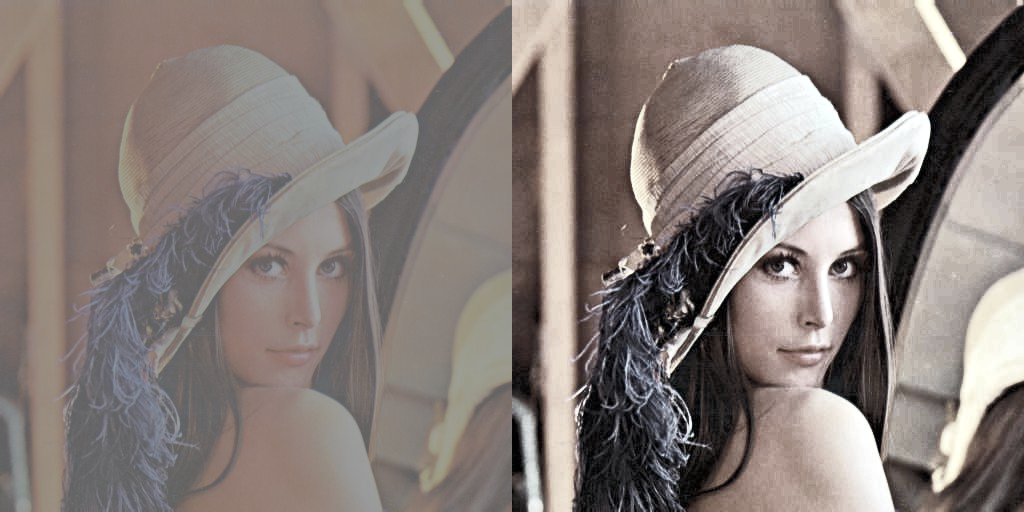

<BarContainer object of 256 artists>

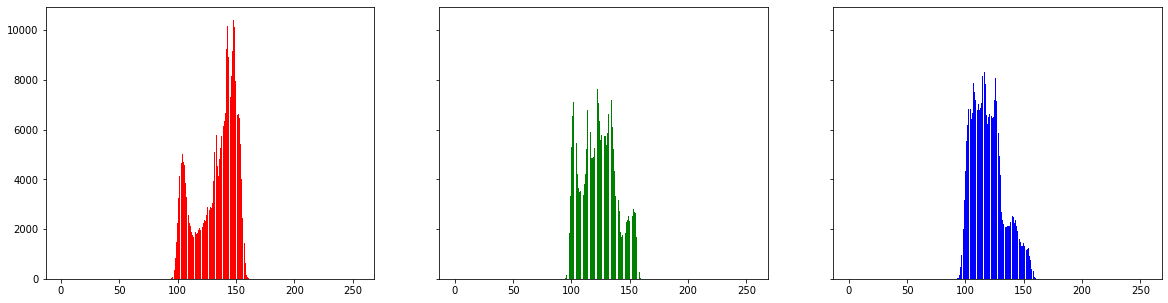

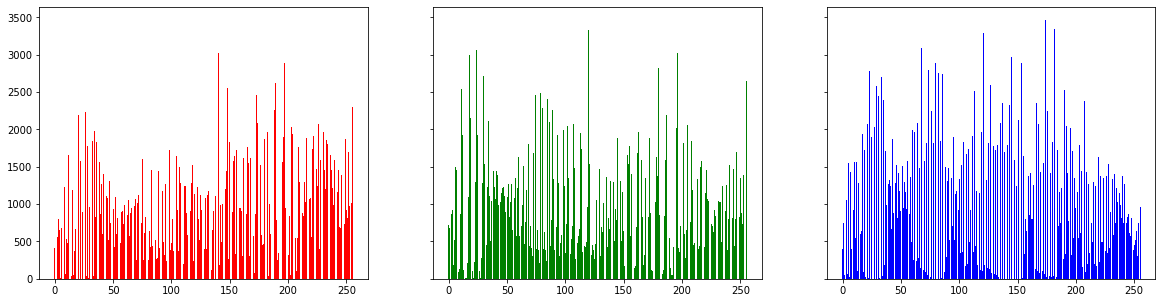

In [7]:
# make histogram function
def create_histogram(img):
  height, width, depth = np.shape(img) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1 
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1 
  return ax

# load image to equalize
img_lc = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 6/Source/lena_lc.jpg')
# convert it to YUV
img_lc_conv = cv.cvtColor(img_lc, cv.COLOR_BGR2YUV)

# equalize the histogram of image
img_lc_conv[:,:,0] = cv.equalizeHist(img_lc_conv[:,:,0])

# convert back the equalize image to BGR
img_lc_conv_equ = cv.cvtColor(img_lc_conv, cv.COLOR_YUV2BGR)

# create histograms for default and equalize images
img_lc_hist = create_histogram(img_lc)
img_lc_equ_hist = create_histogram(img_lc_conv_equ)

# show bot image side by side
final_frame = cv.hconcat((img_lc, img_lc_conv_equ))
cv2_imshow(final_frame)

# show histogram of default image
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
axs[0].bar(names, img_lc_hist[2], color='red')
axs[1].bar(names, img_lc_hist[1], color='green')
axs[2].bar(names, img_lc_hist[0], color='blue')

# show histogram of equalize
names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
axs[0].bar(names, img_lc_equ_hist[2], color='red')
axs[1].bar(names, img_lc_equ_hist[1], color='green')
axs[2].bar(names, img_lc_equ_hist[0], color='blue')


4. Melakukan mapping warna 16 bit ke 8 bit

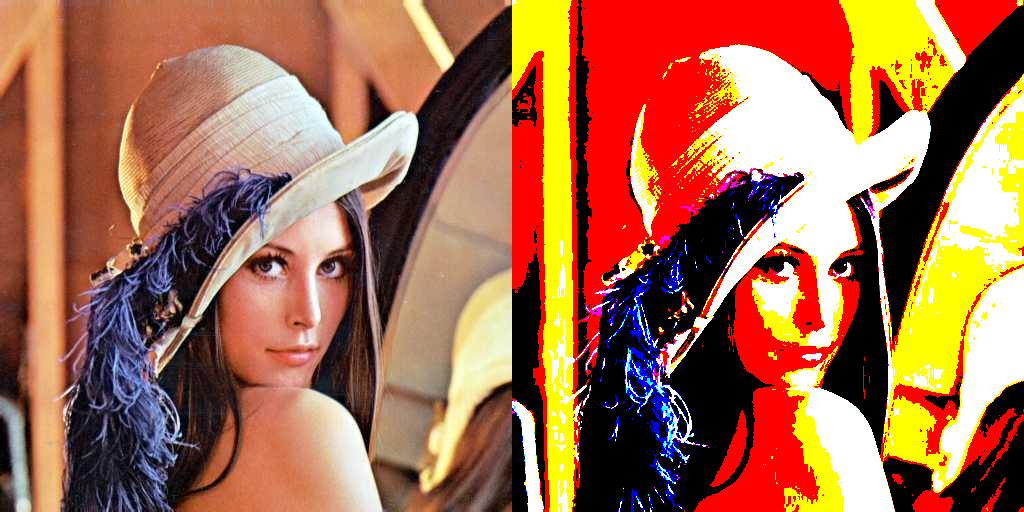

In [8]:
#source: https://github.com/rezarinaldi

# create function to convert nearest color to the same color
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

# load the image
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 6/Source/lena.jpg')

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

# call the function
for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]
    
# show the result
img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)

5. Membuat Floyd Dithering

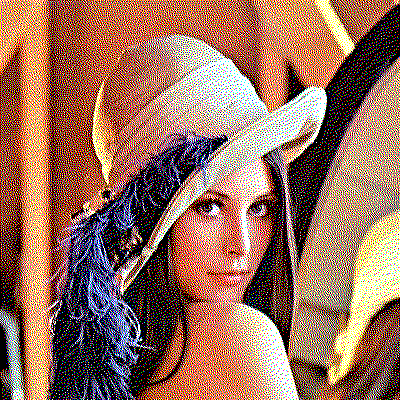

In [13]:
import numpy as np
from PIL import Image

# source: https://scipython.com/blog/floyd-steinberg-dithering/

GREYSCALE = False
img_name = '/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 6/Source/lena.jpg'

# Read in the image, convert to greyscale.
img = Image.open(img_name)
if GREYSCALE:
    img = img.convert('L')

width, height = img.size
new_width = 400
new_height = int(height * new_width / width)
img = img.resize((new_width, new_height), Image.ANTIALIAS)

def get_new_val(old_val, nc):
    """
    Get the "closest" colour to old_val in the range [0,1] per channel divided
    into nc values.

    """

    return np.round(old_val * (nc - 1)) / (nc - 1)

def fs_dither(img, nc):
    """
    Floyd-Steinberg dither the image img into a palette with nc colours per
    channel.

    """

    arr = np.array(img, dtype=float) / 255

    for ir in range(new_height):
        for ic in range(new_width):
            # NB need to copy here for RGB arrays otherwise err will be (0,0,0)!
            old_val = arr[ir, ic].copy()
            new_val = get_new_val(old_val, nc)
            arr[ir, ic] = new_val
            err = old_val - new_val
            # In this simple example, we will just ignore the border pixels.
            if ic < new_width - 1:
                arr[ir, ic+1] += err * 7/16
            if ir < new_height - 1:
                if ic > 0:
                    arr[ir+1, ic-1] += err * 3/16
                arr[ir+1, ic] += err * 5/16
                if ic < new_width - 1:
                    arr[ir+1, ic+1] += err / 16

    carr = np.array(arr/np.max(arr, axis=(0,1)) * 255, dtype=np.uint8)
    return Image.fromarray(carr)

#show di image
img_dither = fs_dither(img, 2)
display(img_dither)